In [98]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the third tab of the Excel file
df = pd.read_excel('F:/DerekS/Manager Research/Copy of Index Price Data.xlsx', sheet_name="Model Data 2")

# Remove the Date column
df = df.drop('Date', axis=1)

# Set the target variable
# target = 'Portfolio Return'
target = 'Factor Excess Return'

# Separate features and target
X = df.drop(target, axis=1)
X = X.iloc[:,3:]
X = X.drop('SPX', axis=1)
y = df[target]

In [99]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=248)

# Create and train the model
regressor = DecisionTreeRegressor(random_state=248,min_samples_leaf = 2, max_depth =10 )
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, random_state=248)

In [100]:
# Make predictions
y_pred = regressor.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.003672231689102469


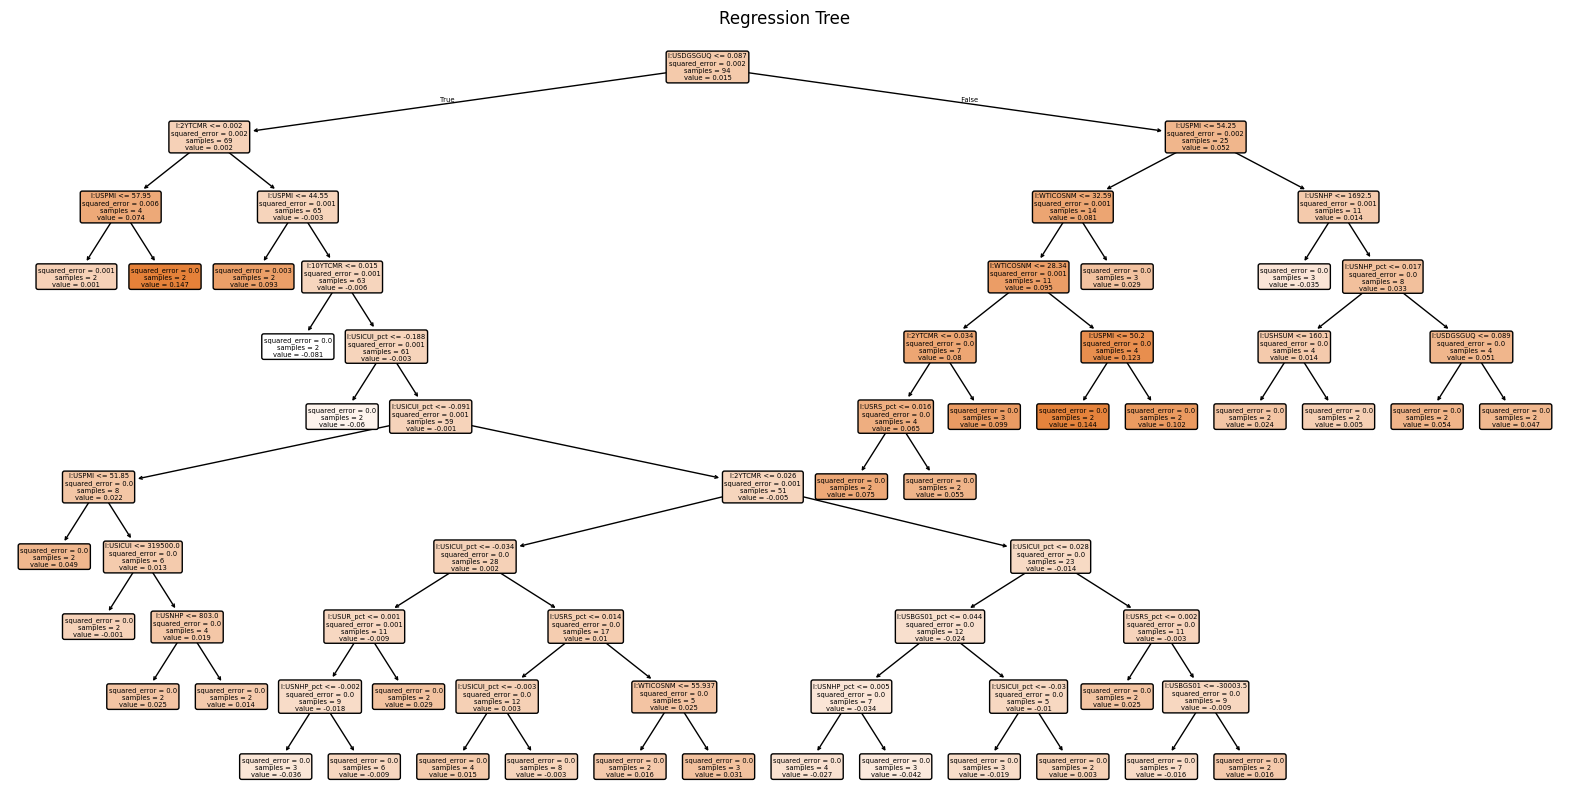

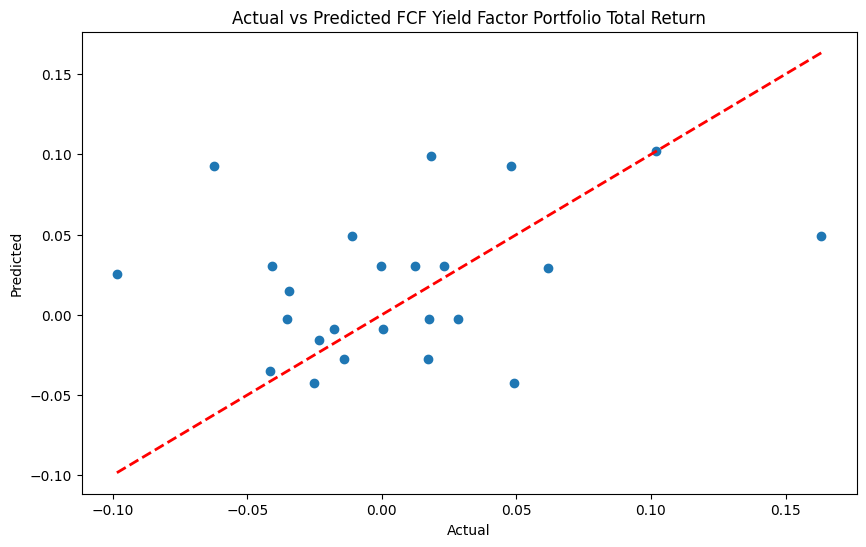

In [101]:
# Plot the regression tree
plt.figure(figsize=(20,10))
plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True)
plt.title("Regression Tree")
plt.show()

# Plot predicted vs actual values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted FCF Yield Factor Portfolio Total Return")
plt.show()

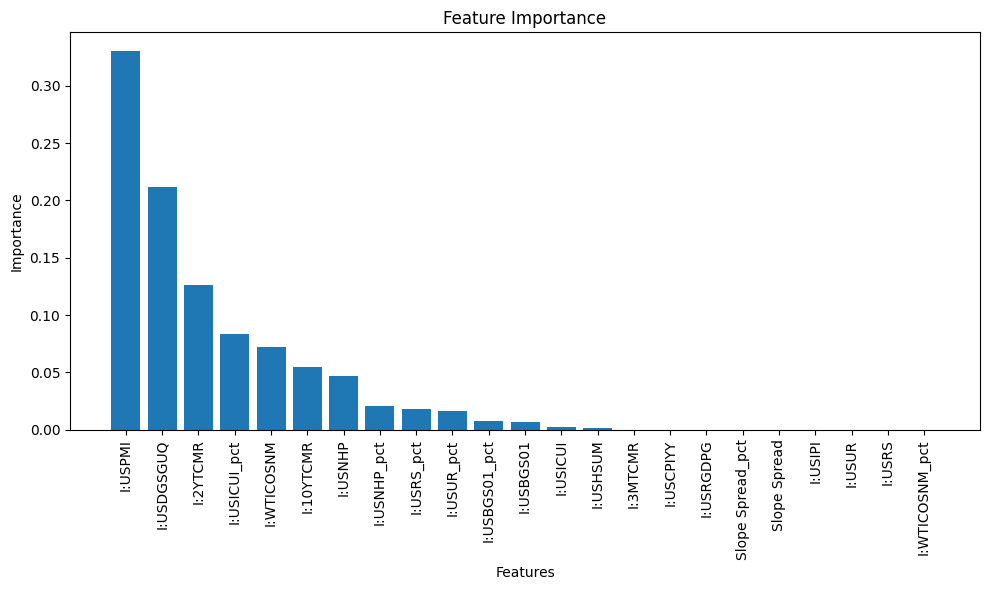

In [102]:
# Get feature importance
importance = regressor.feature_importances_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importance})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
# Define the parameter grid
# param_grid = {
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [5, 10, 15],
#     'min_samples_leaf': [5, 10, 15],
#     #'max_features': ['auto', 'sqrt', 'log2']
# }

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 5],
    #'max_features': ['auto', 'sqrt', 'log2']
}

# Create a decision tree regressor
dt = DecisionTreeRegressor(random_state=42)

# Create the grid search object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=ShuffleSplit(n_splits=5, test_size=.25, random_state=0), n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: -0.0031643041960179494


c:\Users\dstockman\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


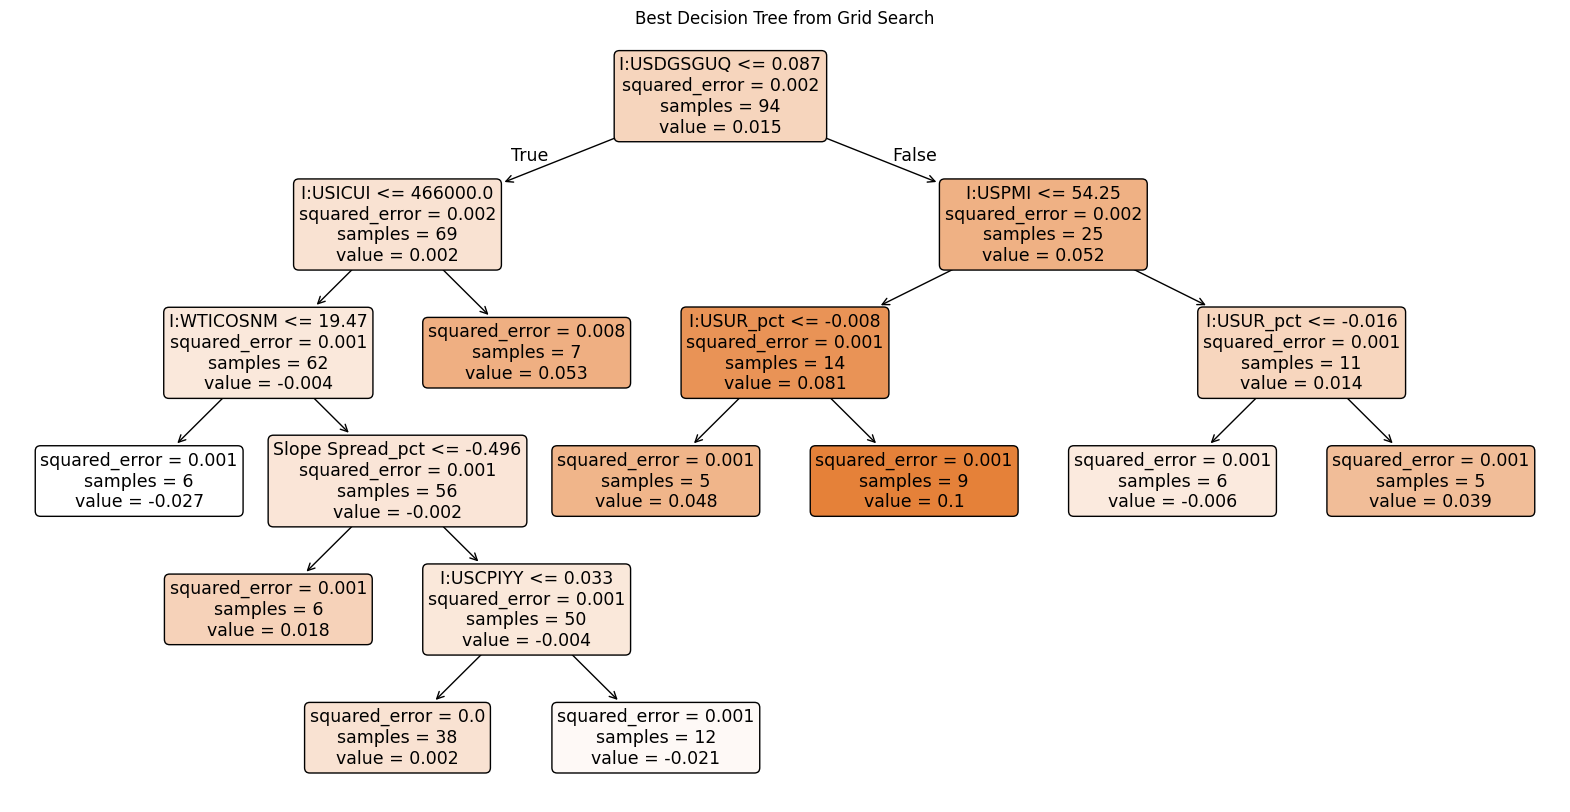

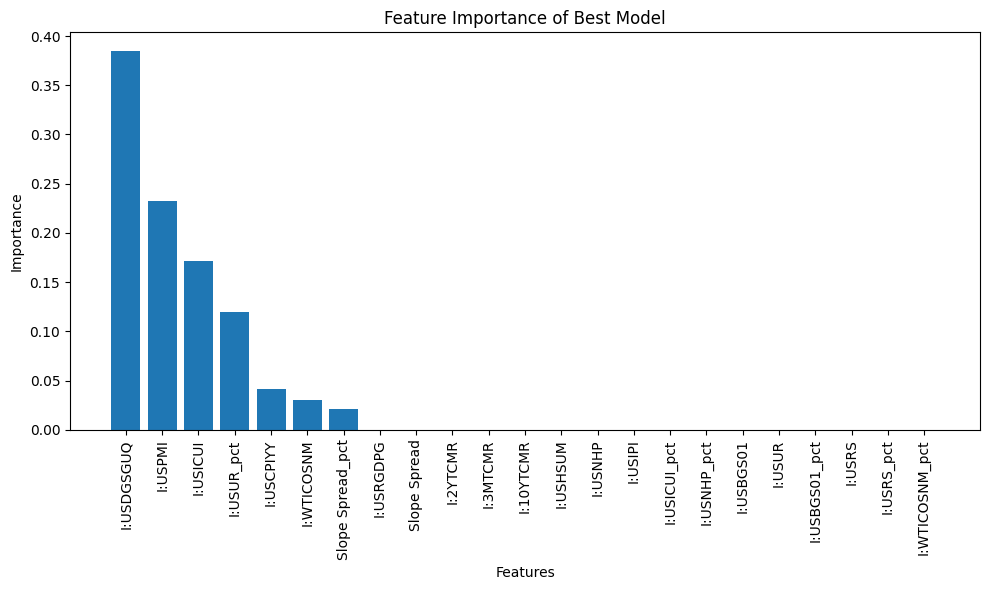

Mean Squared Error: 0.0022452451456391413


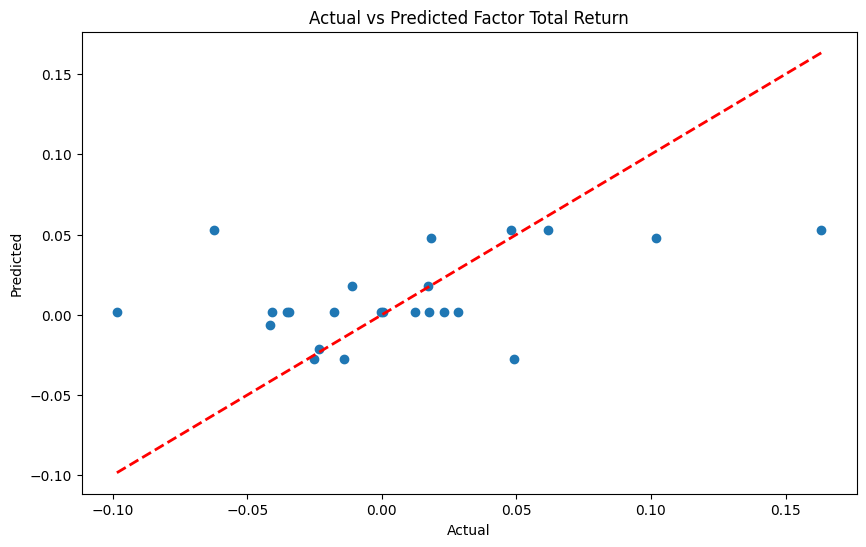

In [104]:
# Get the best model
best_model = grid_search.best_estimator_

# Plot the best decision tree
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Best Decision Tree from Grid Search")
plt.show()

# Plot feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance of Best Model")
plt.tight_layout()
plt.show()

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Plot predicted vs actual values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Factor Total Return")
plt.show()